* 넘파이 다운그레이드 후 텐서플로우와 케라스 설치
아래 명령어는 아나콘다 프롬프트에서 실행할 것
    - conda activate lgchem
    - conda install -c conda-forge numpy=1.19
    - pip install --user tensorflow==2.3
    - pip install --user keras==2.3

In [1]:
import numpy
numpy.__version__

'1.18.5'

In [2]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [3]:
import tensorflow.keras as keras
keras.__version__

'2.4.0'

In [4]:
%pwd

'C:\\Users\\shbaek\\workshop'

In [3]:
# tf2를 설치 후에 tf1 문법으로 활용
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


* 세션: 코드가 어떻게 실행될지 알려주는 소프트웨어 시스템의 환경.
* 텐서플로에서 세션은 CPU나 GPU와 같은 하드웨어 장비가 어떻게 상호작용하는지 설정.
* 사용자는 하드웨어에 상관없이 머신러닝 알고리즘을 디자인할 수 있음.

In [4]:
# 세션의 사용

# tf2를 설치 후에 tf1 문법으로 활용
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

x = tf.constant([[[1., 2.]]])
neg_Matrix = tf.negative(x)

with tf.Session() as sess:
    result = sess.run(neg_Matrix)
    
print(result)

[[[-1. -2.]]]


In [5]:
type(x)

tensorflow.python.framework.ops.Tensor

In [6]:
type(neg_Matrix)

tensorflow.python.framework.ops.Tensor

In [7]:
neg_Matrix

<tf.Tensor 'Neg:0' shape=(1, 1, 2) dtype=float32>

세션에서 활용할 수 있는 데이터의 종류
* 플레이스홀더(placeholder): 아직 값이 할당되지 않았으나 실행 시에 세션에 의해 초기화되는 값을 의미함. 일반적으로 모델의 입력과 출력에 해당됨.
* 변수: 머신러닝 모델의 파라미터처럼 변할 수 있는 값을 의미. 반드시 변수는 사용 전에 세션에 의해 초기화해야 함.
* 상수: 상수 파라미터나 설정값처럼 변하지 않는 값.

텐서 연산자
* tf.add() : a + b
* tf.multiply() : a * b
* tf.subtract() : a - b
* tf.divide() : a / b
* tf.pow() : a ** b
* tf.mod() : a % b
* tf.logical_and() : a & b (dtype 은 tf.bool 이어야 함)
* tf.greater() : a > b
* tf.greater_equal() : a >= b
* tf.less_equal() : a <= b
* tf.less() : a < b
* tf.negative() : -a
* tf.logical_not() : ~a (dtype 은 tf.bool 이어야 함)
* tf.abs() : abs(a)
* tf.logical_or() : a | b (dtype 은 tf.bool 이어야 함)

In [8]:
# tf2를 설치 후에 tf1 문법으로 활용
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

a = tf.constant(5)
b = tf.constant(2)
c = tf.constant(3)
d = tf.multiply(a, b)
e = tf.add(c, b)
f = tf.subtract(d, e)

sess = tf.Session()
outs = sess.run(f)
sess.close()

print("outs = {}".format(outs))

outs = 5


# 텐서플로 1을 이용하여 합성곱 연산 실습

(1, 3, 3, 1)


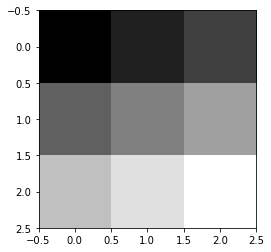

In [11]:
# tf2를 설치 후에 tf1 문법으로 활용
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt

sess = tf.InteractiveSession()

# image 데이터 준비
image = np.array([[[[1], [2], [3]],
                   [[4], [5], [6]],
                   [[7], [8], [9]]]], dtype=np.float32)
print(image.shape)
plt.imshow(image.reshape(3, 3), cmap='gray')

* Image: 1, 3, 3, 1 image, Filter: 2, 2, 1, 1, Stride: 1x1, Padding: VALID

image.shape  (1, 3, 3, 1)
weight.shape  (2, 2, 1, 1)
conv2d_img.shape  (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


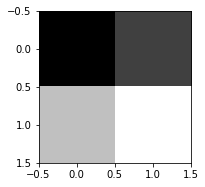

In [13]:
print("image.shape ", image.shape)
weight = tf.constant([[[[1.]], [[1.]]],
                     [[[1.]], [[1.]]]])
print('weight.shape ', weight.shape)

conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='VALID')
conv2d_img = conv2d.eval()
print('conv2d_img.shape ', conv2d_img.shape)

conv2d_img = np.swapaxes(conv2d_img, 0, 3)

for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2, 2))
    plt.subplot(1, 2, i+1), plt.imshow(one_img.reshape(2,2), cmap='gray')
plt.show()

* Image: 1, 3, 3, 1 image, Filter: 2, 2, 1, 1, Stride: 1x1, Padding: SAME

image.shape  (1, 3, 3, 1)
weight.shape  (2, 2, 1, 1)
conv2d_img.shape  (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


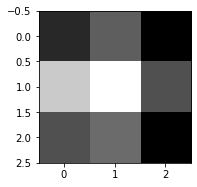

In [14]:
print("image.shape ", image.shape)
weight = tf.constant([[[[1.]], [[1.]]],
                     [[[1.]], [[1.]]]])
print('weight.shape ', weight.shape)

conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
print('conv2d_img.shape ', conv2d_img.shape)

conv2d_img = np.swapaxes(conv2d_img, 0, 3)

for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3, 3))
    plt.subplot(1, 2, i+1), plt.imshow(one_img.reshape(3, 3), cmap='gray')
plt.show()

In [24]:
conv2d_img 

array([[[[12.],
         [16.],
         [ 9.]],

        [[24.],
         [28.],
         [15.]],

        [[15.],
         [17.],
         [ 9.]]]], dtype=float32)

In [25]:
# tf2를 설치 후에 tf1 문법으로 활용
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

pool = tf.nn.max_pool(conv2d_img, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding='SAME')
print(pool.shape)
print(pool.eval())
sess.close()

(1, 3, 3, 1)
[[[[28.]
   [28.]
   [15.]]

  [[28.]
   [28.]
   [15.]]

  [[17.]
   [17.]
   [ 9.]]]]


# 케라스를 이용한 합성곱 신경망의 구현
## 케라스 mnist 필기체인식

In [26]:
# %load CNNBaseline.py
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf # tf2

# seed 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(seed)

# 데이터 불러오기
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [28]:
print(type(X_train), X_train.shape, type(y_train), y_train.shape)
print(type(X_test), X_test.shape, type(y_test), y_test.shape)

<class 'numpy.ndarray'> (60000, 28, 28) <class 'numpy.ndarray'> (60000,)
<class 'numpy.ndarray'> (10000, 28, 28) <class 'numpy.ndarray'> (10000,)


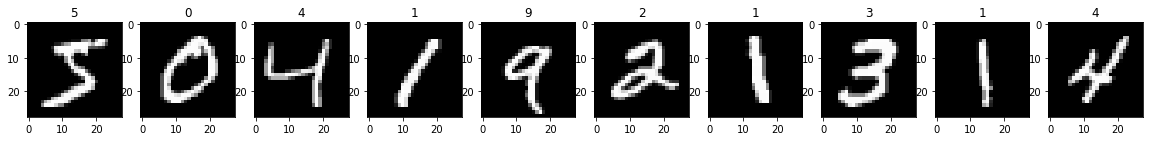

In [30]:
fig, ax = plt.subplots(1, 10, figsize=(20, 4))
for i, img in enumerate(X_train[:10]):
    ax[i].imshow(img, cmap='gray')
    ax[i].set_title(str(y_train[i]))
plt.show()

In [33]:
print(X_train[0].min(), X_train[0].max(), X_train.dtype)

0 255 uint8


In [34]:
y_train[0]

5

In [42]:
to_categorical([1, 3, 5])

array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [35]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')/255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')/255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [36]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [38]:
print(X_train[0].min(), X_train[0].max(), X_train.dtype, X_train.shape)

0.0 1.0 float32 (60000, 28, 28, 1)


In [39]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [40]:
y_test.shape

(10000, 10)

In [41]:
print(X_test[0].min(), X_test[0].max(), X_test.dtype, X_test.shape)

0.0 1.0 float32 (10000, 28, 28, 1)


In [43]:
Conv2D?

In [44]:
MaxPooling2D?

In [45]:
# CNN을 위한 설정, 신경망 아키텍쳐 준비
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer='adam', 
             metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               692352    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               


Epoch 00001: val_loss improved from inf to 0.10917, saving model to ./model\01-0.1092.hdf5

Epoch 00002: val_loss improved from 0.10917 to 0.06962, saving model to ./model\02-0.0696.hdf5

Epoch 00003: val_loss improved from 0.06962 to 0.05572, saving model to ./model\03-0.0557.hdf5

Epoch 00004: val_loss improved from 0.05572 to 0.04869, saving model to ./model\04-0.0487.hdf5

Epoch 00005: val_loss improved from 0.04869 to 0.04464, saving model to ./model\05-0.0446.hdf5

Epoch 00006: val_loss did not improve from 0.04464

Epoch 00007: val_loss improved from 0.04464 to 0.04129, saving model to ./model\07-0.0413.hdf5

Epoch 00008: val_loss improved from 0.04129 to 0.03775, saving model to ./model\08-0.0378.hdf5

Epoch 00009: val_loss improved from 0.03775 to 0.03715, saving model to ./model\09-0.0372.hdf5

Epoch 00010: val_loss did not improve from 0.03715

 Test Accurary: 0.9875


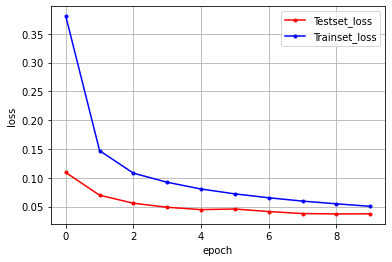

In [46]:
# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath=modelpath, 
                                                  monitor='val_loss', 
                                                  verbose=1, save_best_only=True)
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# 모델의 실행
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=10, batch_size=200, verbose=0, 
                    callbacks=[early_stopping_callback, checkpointer])

# 테스트 정확도 출력
print('\n Test Accurary: %.4f' % (model.evaluate(X_test, y_test)[1]))

# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 시각화
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [50]:
model.predict(X_test[0:1])

array([[4.0340615e-09, 3.5436674e-08, 6.8020348e-08, 5.8679524e-07,
        7.3767886e-10, 5.1802274e-11, 6.3322340e-14, 9.9999905e-01,
        9.5566399e-10, 1.9947042e-07]], dtype=float32)

In [56]:
predicted_index = np.argmax(model.predict(X_test[0:1]))
target_names = np.array(['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine'])
target_names[predicted_index]

'seven'

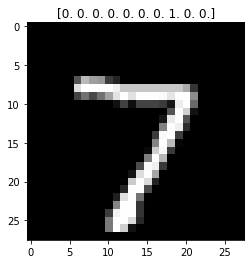

In [52]:
plt.imshow(X_test[0], cmap='gray')
plt.title(str(y_test[0]))
plt.show()

# mnist 패션 데이터에 CNNBaseline.py 코드 적용해보기

In [57]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [59]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
